In [1]:
import numpy as np 
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import cm

In [2]:
import seaborn as sns
from time import time 

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.metrics import mean_squared_log_error, r2_score

In [4]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score

In [5]:
studentperformance = pd.read_csv('StudentsPerformance.csv')

In [6]:
studentperformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
studentperformance.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [8]:
genderdes = studentperformance[['gender']].describe()
genderdes

,gender
count,1000
unique,2
top,female
freq,518


In [9]:
spgender = studentperformance.groupby(['gender']).mean()
spgender

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


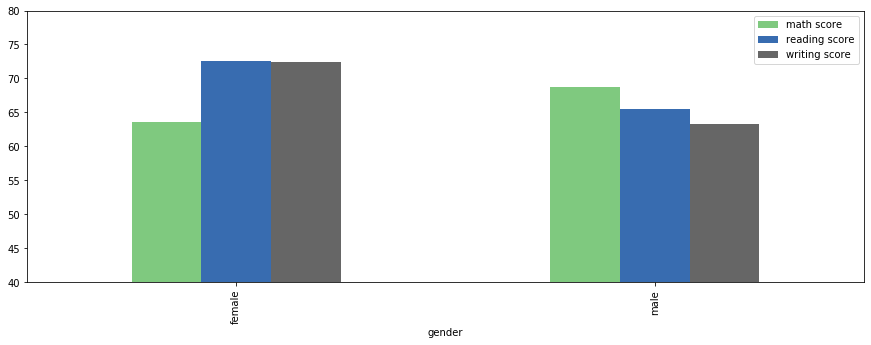

In [10]:
spgender.plot(kind='bar', figsize=(15,5), ylim=(40,80), colormap='Accent')
plt.show()

In [11]:
def linStats(df:pd.DataFrame) -> pd.DataFrame:
    returnDict = {}
    for i in range(df.columns.size):
        id_ = df.columns[i]   
        slope, intercept, rvalue, pvalue, stderr = sc.stats.linregress(np.arange(df[id_].values.size), df[id_].values)
        returnDict[id_] = [slope, intercept, rvalue, pvalue, stderr]
    return pd.DataFrame.from_dict(returnDict, orient='index', columns=['slope', 'intercept', 'rValue', 'pValue', 'stdErr'])

In [12]:
linStats(spgender)

,slope,intercept,rValue,pValue,stdErr
math score,5.095011,63.633205,1.0,0.0,0.0
reading score,-7.135079,72.608108,-1.0,0.0,0.0
writing score,-9.155978,72.467181,-1.0,0.0,0.0


In [13]:
spEducation = studentperformance.groupby(['parental level of education']).mean()

spEducation = spEducation.reindex(['some high school', 'high school', 'some college', 
                                   "associate's degree", "bachelor's degree", "master's degree"])

In [14]:
spEducation

,math score,reading score,writing score
parental level of education,,,
some high school,63.497207,66.938547,64.888268
high school,62.137755,64.704082,62.448980
some college,67.128319,69.460177,68.840708
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
master's degree,69.745763,75.372881,75.677966


In [15]:
spEducation2 = studentperformance.groupby(['gender','parental level of education']).mean()
spEducation2

math score  reading score  writing score
gender parental level of education                                          
female associate's degree            65.250000      74.120690      74.000000
       bachelor's degree             68.349206      77.285714      78.380952
       high school                   59.351064      68.202128      66.691489
       master's degree               66.500000      76.805556      77.638889
       some college                  65.406780      73.550847      74.050847
       some high school              59.296703      69.109890      68.285714
male   associate's degree            70.764151      67.433962      65.405660
       bachelor's degree             70.581818      68.090909      67.654545
       high school                   64.705882      61.480392      58.539216
       master's degree               74.826087      73.130435      72.608696
       some college                  69.009259      64.990741      63.148148
       some high school              67.840909      64.693182      61.375000

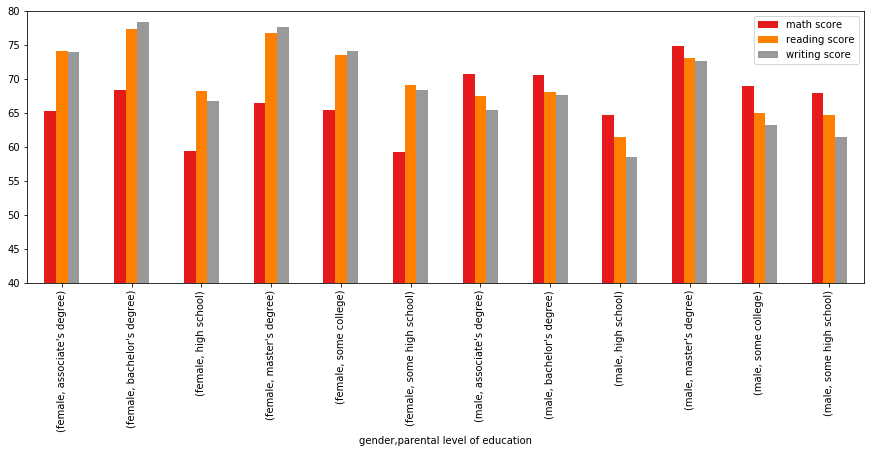

In [16]:
spEducation2.plot(kind='bar', figsize=(15,5), ylim=(40,80), colormap='Set1')
plt.show()

In [17]:
linStats(spEducation2)

,slope,intercept,rValue,pValue,stdErr
math score,0.562194,63.731419,0.449796,0.142340,0.353010
reading score,-0.959933,75.187500,-0.687513,0.013483,0.320626
writing score,-1.231179,75.753080,-0.695163,0.012084,0.402600


In [18]:
testprep = studentperformance.groupby(['gender','test preparation course']).mean()
testprep

math score  reading score  writing score
gender test preparation course                                          
female completed                 67.195652      77.375000      78.793478
       none                      61.670659      69.982036      68.982036
male   completed                 72.339080      70.212644      69.793103
       none                      66.688312      62.795455      59.649351

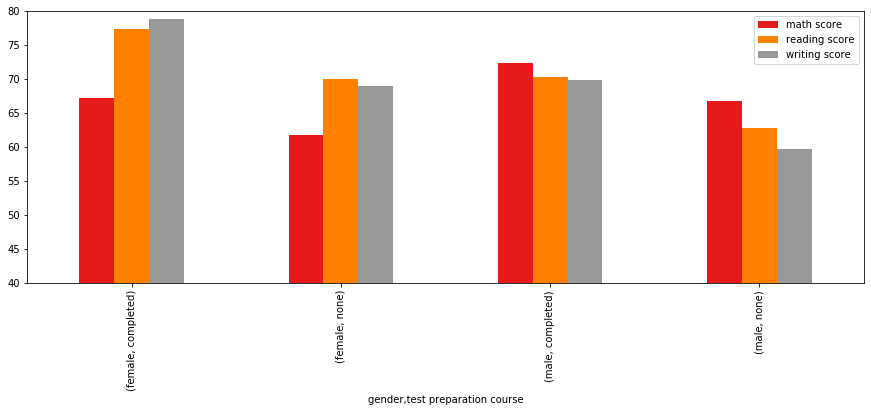

In [19]:
testprep.plot(kind='bar', figsize=(15,5), ylim=(40,80), colormap='Set1')
plt.show()

In [20]:
lunch = studentperformance.groupby(['gender', 'lunch']).mean()
lunch

math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

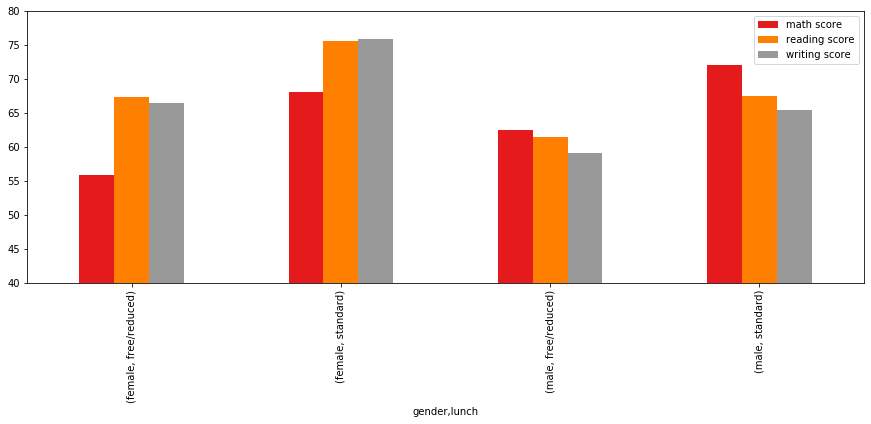

In [21]:
lunch.plot(kind='bar', figsize=(15,5), ylim=(40,80), colormap='Set1')
plt.show()

In [22]:
def letterGrade(x:float) -> float:
    gradeMethod = {x>=90:'A', 90>x>=80:'B', 80>x>=70:'C', 70>x>=60:'D', x<60:'F'}
    return gradeMethod[True]

In [23]:
studentperformance['class grade'] = (studentperformance['math score'] + studentperformance['reading score'] + studentperformance['writing score']) / 3

In [24]:
studentperformance['class grade'] = studentperformance['class grade'].apply(letterGrade)
studentperformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,class grade
0,female,group B,bachelor's degree,standard,none,72,72,74,C
1,female,group C,some college,standard,completed,69,90,88,B
2,female,group B,master's degree,standard,none,90,95,93,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,C


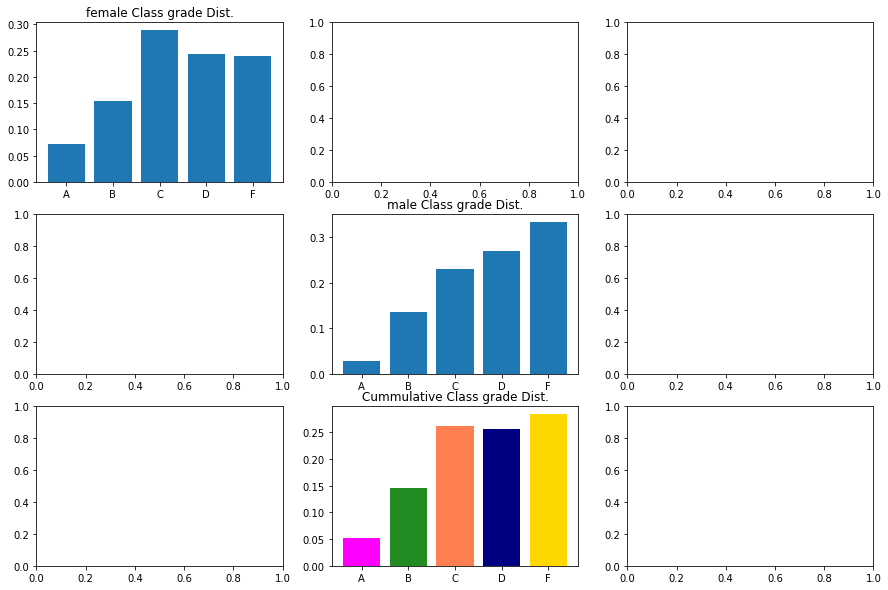

In [25]:
figure, axes = plt.subplots(3,3)
figure.set_figheight(10); figure.set_figwidth(15)
gend = studentperformance['gender'].unique()

# itterate through each unique gender, help for subplots
for group in range(gend.size):

    # filter out the scores according to each education level
    values = studentperformance[studentperformance['gender'] == gend[group]]
    
    # count the number of occurences for each letter grade and scale to sample size
    sortedGroup = values.groupby('class grade')['gender'].count()
    scaledGroup = sortedGroup / sortedGroup.values.sum()
    
    axes[group%2, group%3].bar(scaledGroup.index, scaledGroup.values)
    axes[group%2, group%3].set_title('{} Class grade Dist.'.format(gend[group]))

# cummulative grade distribution 
cummPerf = studentperformance.groupby('class grade')['gender'].count()
scaleCummGroup = cummPerf / cummPerf.values.sum()

axes[2, 1].bar(scaleCummGroup.index, scaleCummGroup.values, color=['fuchsia', 'forestgreen', 'coral', 'navy', 'gold'])
axes[2, 1].set_title('Cummulative Class grade Dist.')
    
plt.show()

In [26]:
studentperformance.groupby(['gender'])['class grade'].count() / 1000

gender
female    0.518
male      0.482
Name: class grade, dtype: float64

Model Development

Feature engineering we are creating new combinations. Expanding more on existing data. Can be more data or manipulation of existing data

In [27]:
rngState = 1             # set the random number generator state
lm = LabelEncoder() 

In [28]:
# divide training and test data from independent variables
X = studentperformance[studentperformance.columns[1:8]]
X = X.apply(lm.fit_transform)     # convert categorical data to dummy variables (numerics) 

Y = studentperformance['gender']

In [29]:
X.head()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,1,1,1,52,44,50
1,2,4,1,0,49,62,64
2,1,3,1,1,70,67,69
3,0,0,0,1,27,29,20
4,2,4,1,1,56,50,51


In [30]:
Y.head()

0    female
1    female
2    female
3      male
4      male
Name: gender, dtype: object

In [31]:
from itertools import combinations

In [32]:
tierFeatures = combinations(X.columns, 2)

In [33]:
def featureEng(X:pd.DataFrame, tiering:list) -> pd.DataFrame:
    
    # itterate through each mixed feature tier
    for i, j in tiering:
        name = '{}_{}'.format(i,j)

        # combining values for cross-product terms
        X[name] = X[i] + X[j]
    
    return X

In [34]:
X = featureEng(X, tierFeatures)

In [35]:
X.nunique()

race/ethnicity                                           5
parental level of education                              6
lunch                                                    2
test preparation course                                  2
math score                                              81
reading score                                           72
writing score                                           77
race/ethnicity_parental level of education              10
race/ethnicity_lunch                                     6
race/ethnicity_test preparation course                   6
race/ethnicity_math score                               80
race/ethnicity_reading score                            73
race/ethnicity_writing score                            75
parental level of education_lunch                        7
parental level of education_test preparation course      7
parental level of education_math score                  78
parental level of education_reading score               

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=rngState)

In [37]:
# feature selection for the most relevant figures (f_classif imported)
selector = SelectKBest(f_classif, k=5)

selector.fit(x_train, y_train)     # assign class fit

# feature selection fromm the f_classifier
featureDF = pd.DataFrame.from_dict(dict(zip(x_train.columns, list(zip(selector.pvalues_, selector.scores_))))).transpose()
featureDF.columns = ['pValue', 'scores']

In [38]:
featureDF

,pValue,scores
race/ethnicity,7.977083e-01,0.065744
parental level of education,4.910536e-01,0.474684
lunch,1.065947e-01,2.610280
test preparation course,9.874553e-01,0.000247
math score,2.263340e-05,18.183257
reading score,9.177525e-14,57.689116
writing score,1.813052e-19,86.091208
race/ethnicity_parental level of education,4.652742e-01,0.533724
race/ethnicity_lunch,7.058935e-01,0.142522
race/ethnicity_test preparation course,8.181497e-01,0.052903


In [39]:
# selecting only significant features, (pValues < 0.05)
featureDF = featureDF[featureDF.pValue < 0.05].sort_values(by='scores', ascending=False)

# select top significant features from the scoring algorithm 
selectFeatures = featureDF[featureDF.scores > 5].index

In [40]:
selectFeatures

Index(['parental level of education_writing score',
       'test preparation course_writing score', 'writing score',
       'race/ethnicity_writing score', 'lunch_writing score',
       'reading score_writing score',
       'parental level of education_reading score',
       'test preparation course_reading score', 'reading score',
       'race/ethnicity_reading score', 'lunch_reading score',
       'test preparation course_math score', 'lunch_math score', 'math score',
       'parental level of education_math score', 'race/ethnicity_math score',
       'math score_writing score'],
      dtype='object')

In [41]:
# once you select most important features, hyper parameterization. Trying to optimize or minimize the function

parameters = {'random_state':[rngState], 'solver':['newton-cg', 'lbfgs', 'sag'], 
             'penalty':['l2'], 'multi_class': ['ovr', 'multinomial']}

# perform grid-search CV (cross validation) on classifier. testing all parameters, splitting test data

mdl = GridSearchCV(estimator=LogisticRegression(), param_grid=parameters, verbose=1)

In [42]:
mdl.fit(x_train[selectFeatures], y_train) 

#select features have already been determined, we are changing hyper parameters based on cell 85
#things we adjust to create marginal increase or decrease in performance.

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was

GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'multi_class': ['ovr', 'multinomial'],
                         'penalty': ['l2'], 'random_state': [1],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [43]:
mdl.best_estimator_

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2', random_state=1,
                   solver='newton-cg', tol=0.0001, verbose=0, warm_start=False)

In [44]:
pred = mdl.predict(x_test[selectFeatures])
pred

array(['male', 'female', 'female', 'female', 'male', 'female', 'female',
       'male', 'female', 'male', 'male', 'female', 'female', 'female',
       'male', 'female', 'male', 'female', 'female', 'male', 'male',
       'female', 'female', 'male', 'female', 'female', 'female', 'female',
       'female', 'female', 'male', 'male', 'male', 'female', 'female',
       'male', 'female', 'male', 'male', 'female', 'male', 'female',
       'female', 'female', 'female', 'female', 'female', 'female', 'male',
       'female', 'female', 'male', 'male', 'male', 'female', 'female',
       'female', 'female', 'male', 'female', 'male', 'male', 'male',
       'female', 'male', 'female', 'male', 'female', 'female', 'female',
       'female', 'male', 'female', 'male', 'male', 'male', 'female',
       'male', 'male', 'male', 'female', 'female', 'male', 'male',
       'female', 'female', 'female', 'male', 'female', 'female', 'female',
       'female', 'female', 'male', 'female', 'male', 'male', 'female',
  

In [45]:
accuracy_score(y_test, pred), mdl.score(x_test[selectFeatures], y_test), mdl.score(x_train[selectFeatures], y_train) 

(0.892, 0.892, 0.896)

# CH 3: CLASSIFICATION

# Most common supervised learning tasks are regression (predicting values) and classification (prediction classes)

In [46]:
#download MNSIt using scokitlearn 
from sklearn.datasets import fetch_openml

In [47]:
mnist = fetch_openml('mnist_784', version=1)

In [48]:
#Dictionary pointing to what everything is going to be in the data
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [49]:
X, y = mnist["data"], mnist["target"]

In [50]:
X.shape #70,000 images and each has anumber 0-9 decomposed into 784 pixels.

(70000, 784)

In [51]:
len(mnist['feature_names']) #784 pixels

784

In [52]:
y.shape

(70000,)

In [53]:
#Taking a look at one digit from the dataset. All we need to do is grab an instance's feature vector, reshape
#it to a 28x28 array and display it using Matplotlib's imshow() function 

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [54]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

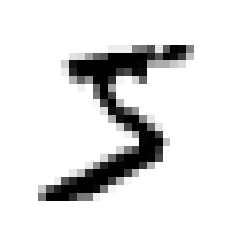

In [55]:
plt.imshow(some_digit_image, cmap="binary") 
plt.axis("off")
plt.show()

In [56]:
y[0]

'5'

In [57]:
#note that the label is a string so we should cast y to be an integer
y = y.astype(np.uint8)

In [58]:
#You should always create a test set and set it aside before inspecting the data closely
#The MNIST dataset is already split into a training set (the first 60,000 images) and a test set (the last 10,000)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Training a Binary Classifier

In [59]:
#we are now in a position to train detect the number 5, so the clssifier will distinguish between just two classes 5 
#and not 5

y_train_5 = (y_train ==5) #true for all 5's and false for other digits
y_test_5 = (y_test == 5)

In [60]:
#Now we have to select a classifier and train it. Stochastic Gradient Descent (SGD) classifier. A good one to use is
#SciKit learn's SGDClassifier which is efficient at handling very large datasets and  trains independently
from sklearn.linear_model import SGDClassifier

In [61]:
sgd_clf = SGDClassifier(random_state=42) #if you want reproducible results set a random_state
sgd_clf.fit(X_train, y_train_5) #what does this step do? why use y_train_5 instead of y_train

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [62]:
#now we can use it to detect the number 5
sgd_clf.predict([some_digit])

array([ True])

Performance Measures

There are many ways to evaluate a performance measure, more so that a regressor. There are many performance measures available methods inculde Cross Validation, Confusion Matrix, Precision & Recall, Precision & Recall: Trade off, The ROC Curve

# CROSS VALIDATION 

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [64]:
skfolds = StratifiedKFold(n_splits=3, random_state=42)

In [65]:
for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.95035
0.96035
0.9604


In [66]:
#using the cross_val_score instead

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy") #cv is the number of folds

array([0.95035, 0.96035, 0.9604 ])

In [67]:
#Lets look at a dumb classifier that classifies each single image in the not-5 class
from sklearn.base import BaseEstimator 

In [68]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [69]:
#Now the accuracy of this model?
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

# CONFUSION MATRIX

In [70]:
from sklearn.model_selection import cross_val_predict

In [71]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

#just like the cross_val_score() the cross_val_predict() performs K-fold cross validation but instead of returning
#evaluation scores it returns the prefictions made on each test fold. This means you get a clean prediction for each
#instance in the training set 

In [72]:
from sklearn.metrics import confusion_matrix

In [73]:
confusion_matrix(y_train_5, y_train_predict) #pass it the target classes and the predicted classes 

array([[53892,   687],
       [ 1891,  3530]])

Negative class 
True negatives: 53,892 correctly classified as non-5 images
False positives: 687 wrongly classified as 5s

Positive class:
False negatives: 1891 wrongly classified as non-5
True positives: 3530 correctly classifies as 5s

In [74]:
y_train_perfect_predictions = y_train_5 #pretend we reach perfection 

In [75]:
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

A more precise metric is called a precision the accuracy of the positive predictions tp/(tp+fp). Also used along with another metric called Recall aka sensitivity or true Positivity rate tp/(tp+fn)

# PRECISION & RECALL

In [76]:
#SciKit Learn provides several functuons to compute classifier metrics, including precision and recall
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_predict)

0.8370879772350012

In [77]:
recall_score(y_train_5, y_train_predict)

0.6511713705958311

In [78]:
#The F1 score combines the precision and recall score into a single metric. Or comparimg 2 classifiers the F1 score
#is the Harmonic Mean of precision and recall
#Simply call the f1_score() function. Increasing precision reduces recall and vice versa cant have it both ways

In [79]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_predict)

0.7325171197343846

# PRECISION & RECALL TRADE OFF 

In [80]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [81]:
threshold = 0 

In [82]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [83]:
threshold = 8000 

In [84]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [85]:
#How to decide which threshold to us? Use function to return decision scores 
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [86]:
#with these scores use precision_recall_curve() function to comput precision and recall for all thresholds 
from sklearn.metrics import precision_recall_curve

In [87]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

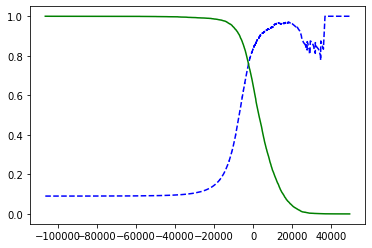

In [88]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [89]:
#You can search for the lowest threshold that gives 90% precision 
threshold_90_precision = thresholds[np.argmax(precisions>=0.90)]
threshold_90_precision

3370.0194991439557

In [90]:
#to make predictions on the training set for now without calling the classifier's predict method
y_train_pred_90 = (y_scores >= threshold_90_precision)
y_train_pred_90

array([False, False, False, ...,  True, False, False])

In [91]:
#Lets check these predictions' precisions and recall
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [92]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

You now have a 90% precision classifier by setting the threshold high enough. However a high precision classifier is not very useful if its recall is too low 

# THE ROC CURVE

The Receiver operating characteristic curve is another common tool used with binary classifiers. It plots true positive rate (aka Recall) against false positive rate. It uses FPR, and TNR. FPR is the ratio of negative instance that are incorrectly classified as positive. TNR is called specificity. 

In [93]:
from sklearn.metrics import roc_curve

In [94]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

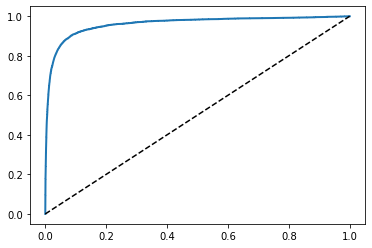

In [95]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    [...]

plot_roc_curve(fpr,tpr)
plt.show()

One way to compare classifiers is to measure area under the curve and the perfect classifier will have an area of 1 whereas a purely random classifier will have a ROC AUC of .5

In [96]:
from sklearn.metrics import roc_auc_score

In [97]:
#area under the curve for the Reciever opearating characteristic ROC curve
roc_auc_score(y_train_5,y_scores)

0.9604938554008616

Now lets train a RandomForestClassifier and comare its ROC curve and ROC AUC score to those of SGDClassifier.

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [100]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

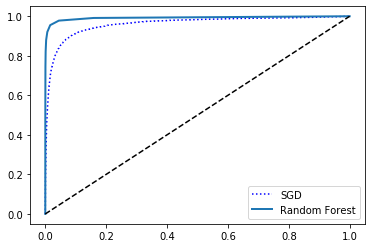

In [101]:
#Now you are ready to plot the ROC Curve

plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

#the Random Forest is superior 

# Multiclass Classification

Distinguishes between more than two classifiers. SGD classifier, Random forest Classifiers and naive Bayes classifiers are capable to handling multiple classes natively. Whereas Logistic Regression or Support Vector Machine classifiers are strictly binary

Using Support vector machine classifier used in trying to use binary classfication algorithm for a multiclass classification

In [102]:
from sklearn.svm import SVC

In [103]:
svm_clf = SVC()

In [ ]:
svm_clf.fit(X_train, y_train)

/Users/atreish/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
svm_clf.predict([some_digit])

In [ ]:
#If you call the decision_function() method, you will see that it returns 10 scores per instance instead of 1. 


# ERROR ANALYSIS

Assume you have found a good model and want to find ways to imporve it. One way is to analyze the types of errors it makes.

In [ ]:
#first look at the confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [ ]:
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx